# PV Mismatch Simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pv_system import create_system, create_Rsh_degraded_system, create_Rs_degraded_system, plot_pv_system
from mismatch_models import shade_modules, remove_modules

### Example 1: Basic system

Pmp: 139533.83415132738  Vmp: 787.6286350945819  Imp: 177.15688324939018


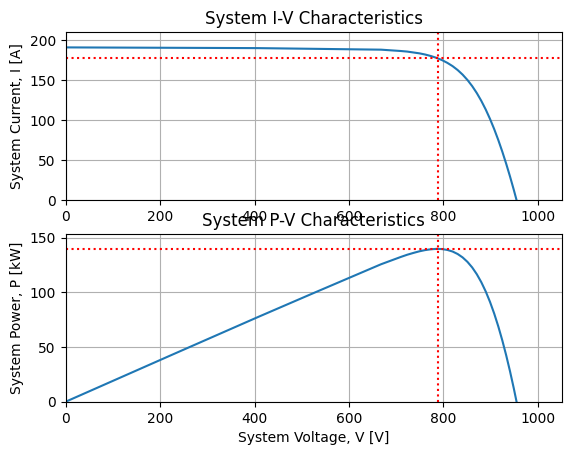

In [33]:
pvsys = create_system()
print("Pmp:", pvsys.Pmp, " Vmp:", pvsys.Vmp, " Imp:", pvsys.Imp)
ex1 = pvsys.plotSys()

### Example 2: Single module shading

Pmp after shading: 139152.53908254876
Imp after shading: 177.2115278960844
Vmp after shading: 785.2341251983722


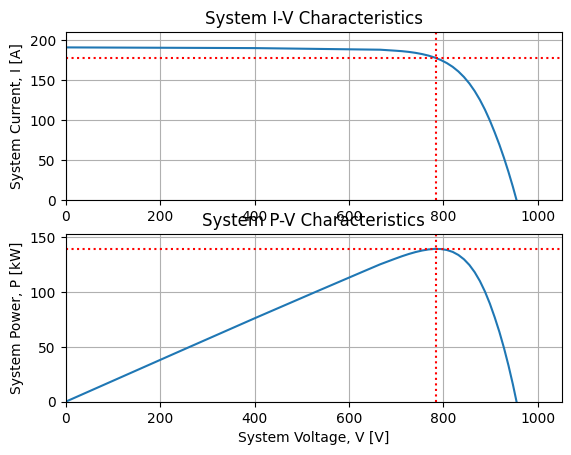

In [34]:
pvsys = create_system()
shade_modules(pvsys, {0: {0: 0.01}})
print("Pmp after shading:", pvsys.Pmp)
print("Imp after shading:", pvsys.Imp)
print("Vmp after shading:", pvsys.Vmp)
ex2 = pvsys.plotSys()

### Example 3: Partial shading & heating

Pmp after partial shading & heating: 135822.52228351435
Imp after partial shading & heating: 175.41173571092526
Vmp after partial shading & heating: 774.3069283992886


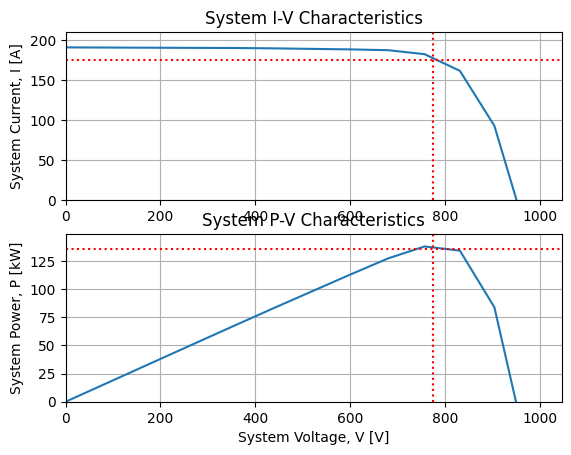

In [35]:
pvsys = create_system()
shade_modules(pvsys, {0: {0: [(0.2,)*8, (0,1,2,3,4,5,6,7)]}})
pvsys.setTemps({0:{0:[(100.0+273.15,)*8, (0,1,2,3,4,5,6,7)]}})
print("Pmp after partial shading & heating:", pvsys.Pmp)
print("Imp after partial shading & heating:", pvsys.Imp)
print("Vmp after partial shading & heating:", pvsys.Vmp)
ex3 = pvsys.plotSys()

### Example 4: Module removal

Module equivalent loss: 16.295164996505843
Pmp after module removal: 63742.939148295314
Imp after module removal: 177.3064252198471
Vmp after module removal: 359.5072150896883


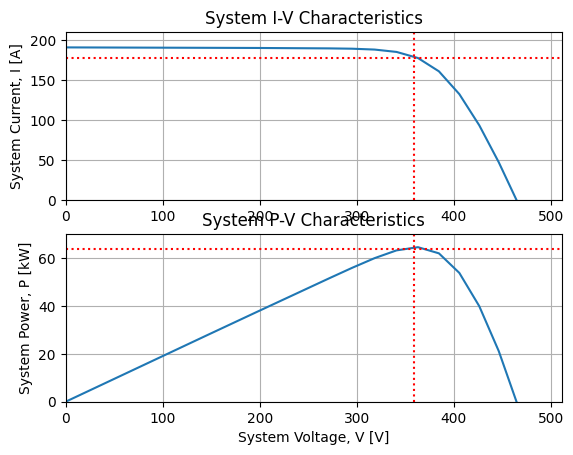

In [36]:
pvsys = create_system()
pvsys_degraded = remove_modules(pvsys, n_missing=12, strings_with_missing=10)
module_eq_diff = (pvsys.Pmp - pvsys_degraded.Pmp) / (pvsys.Pmp/len(pvsys.numberMods))
print("Module equivalent loss:", module_eq_diff)
print("Pmp after module removal:", pvsys_degraded.Pmp)
print("Imp after module removal:", pvsys_degraded.Imp)
print("Vmp after module removal:", pvsys_degraded.Vmp)
ex4 = pvsys_degraded.plotSys()

### Example 5: Loop over number of strings

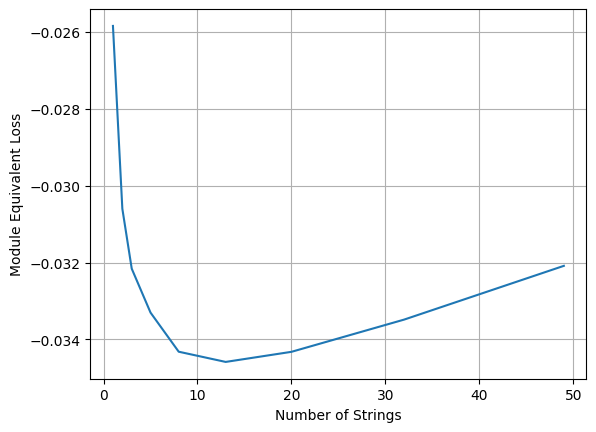

In [37]:
num_strings_list = np.unique(np.logspace(0, np.log10(50), num=10, dtype=int))
module_eq_diff_list = []

for num_strings in num_strings_list:
    sys = create_system(num_strings=num_strings)
    # shade module 0 in string 0 to 90% irradiance
    shade_modules(sys, {0:{0:0.9}})
    diff = (sys.Pmp - create_system(num_strings=num_strings).Pmp)/(sys.Pmp/len(sys.numberMods))
    module_eq_diff_list.append(diff)

plt.figure()
plt.plot(num_strings_list, module_eq_diff_list)
plt.xlabel("Number of Strings")
plt.ylabel("Module Equivalent Loss")
plt.grid()

### Example 6: Healthy vs Exponentially Degraded System

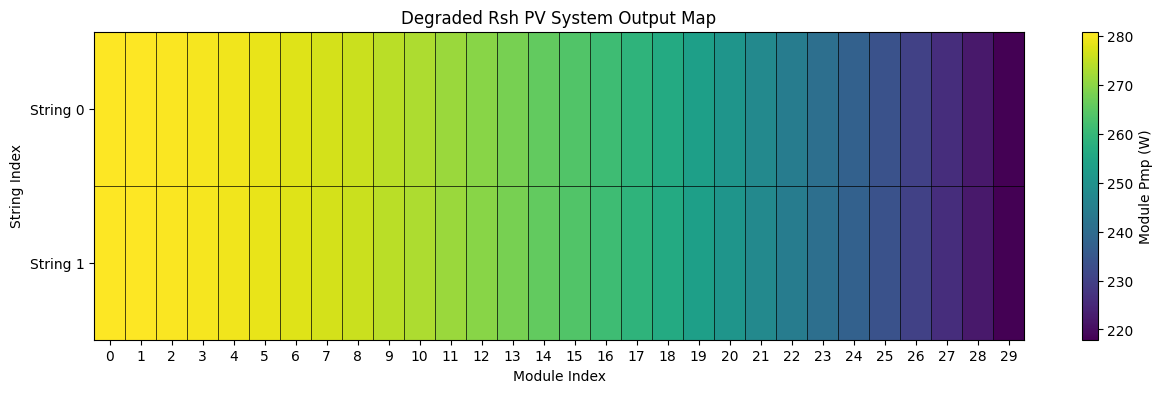

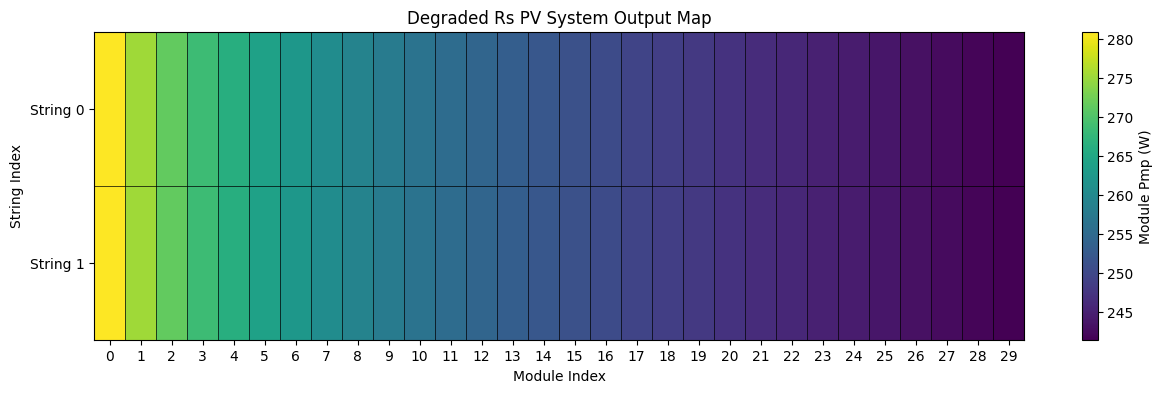

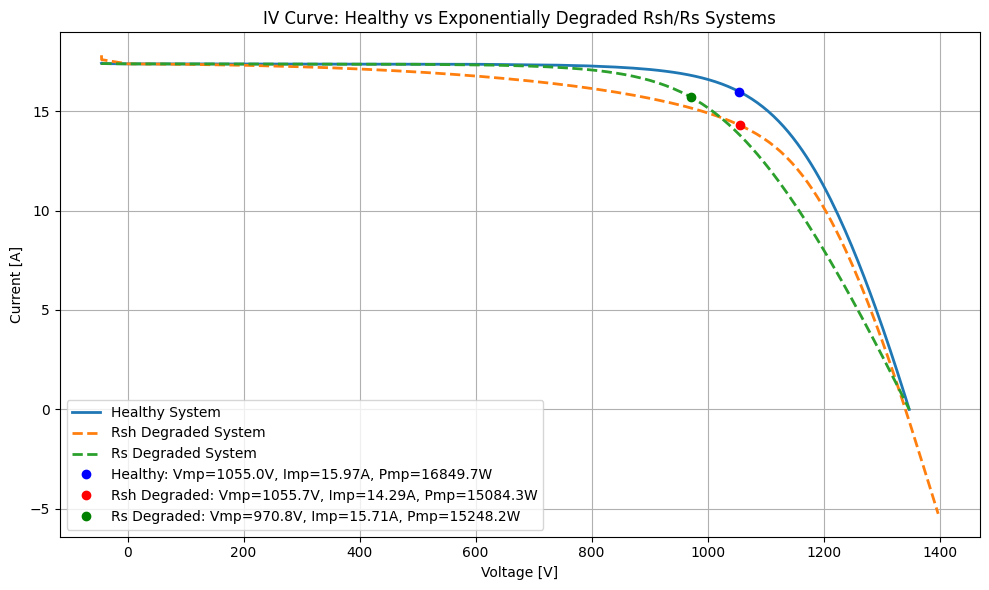

Healthy Pmp: 16849.723929502612
Rsh Degraded Pmp: 15084.32082027392
Rs Degraded Pmp: 15248.233127430683


In [4]:
# Healthy system
pvsys_healthy = create_system()

# Exponentially degraded Rsh system
pvsys_Rsh_degraded = create_Rsh_degraded_system()
plot_pv_system(pvsys_Rsh_degraded, title="Rsh")
plt.show()

# Exponentially degraded Rs system
pvsys_Rs_degraded = create_Rs_degraded_system()
plot_pv_system(pvsys_Rs_degraded, title="Rs")
plt.show()

# Prepare legend labels with Pmp info
label_healthy = (f"Healthy: Vmp={pvsys_healthy.Vmp:.1f}V, "
                 f"Imp={pvsys_healthy.Imp:.2f}A, Pmp={pvsys_healthy.Pmp:.1f}W")
label_Rsh_degraded = (f"Rsh Degraded: Vmp={pvsys_Rsh_degraded.Vmp:.1f}V, "
                  f"Imp={pvsys_Rsh_degraded.Imp:.2f}A, Pmp={pvsys_Rsh_degraded.Pmp:.1f}W")
label_Rs_degraded = (f"Rs Degraded: Vmp={pvsys_Rs_degraded.Vmp:.1f}V, "
                  f"Imp={pvsys_Rs_degraded.Imp:.2f}A, Pmp={pvsys_Rs_degraded.Pmp:.1f}W")

# Plot IV curves
plt.figure(figsize=(10,6))
plt.plot(pvsys_healthy.Vsys, pvsys_healthy.Isys, label="Healthy System", lw=2)
plt.plot(pvsys_Rsh_degraded.Vsys, pvsys_Rsh_degraded.Isys, label="Rsh Degraded System", lw=2, ls="--")
plt.plot(pvsys_Rs_degraded.Vsys, pvsys_Rs_degraded.Isys, label="Rs Degraded System", lw=2, ls="--")

# Highlight Pmp points
plt.plot(pvsys_healthy.Vmp, pvsys_healthy.Imp, 'o', color='blue', label=label_healthy)
plt.plot(pvsys_Rsh_degraded.Vmp, pvsys_Rsh_degraded.Imp, 'o', color='red', label=label_Rsh_degraded)
plt.plot(pvsys_Rs_degraded.Vmp, pvsys_Rs_degraded.Imp, 'o', color='g', label=label_Rs_degraded)

plt.xlabel("Voltage [V]")
plt.ylabel("Current [A]")
plt.title("IV Curve: Healthy vs Exponentially Degraded Rsh/Rs Systems")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: print Pmp values
print("Healthy Pmp:", pvsys_healthy.Pmp)
print("Rsh Degraded Pmp:", pvsys_Rsh_degraded.Pmp)
print("Rs Degraded Pmp:", pvsys_Rs_degraded.Pmp)